#Car Price Prediction_linear_and_lasso

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [1]:
import kagglehub
path = kagglehub.dataset_download("nehalbirla/vehicle-dataset-from-cardekho")

Using Colab cache for faster access to the 'vehicle-dataset-from-cardekho' dataset.


In [8]:
vehicle_data = pd.read_csv(path + '/car data.csv')

In [9]:
vehicle_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
vehicle_data.shape

(301, 9)

In [11]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
# checking the number of missing values
vehicle_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [15]:
# checking the distribution of categorical data
print(vehicle_data.Fuel_Type.value_counts())
print(vehicle_data.Seller_Type.value_counts())
print(vehicle_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


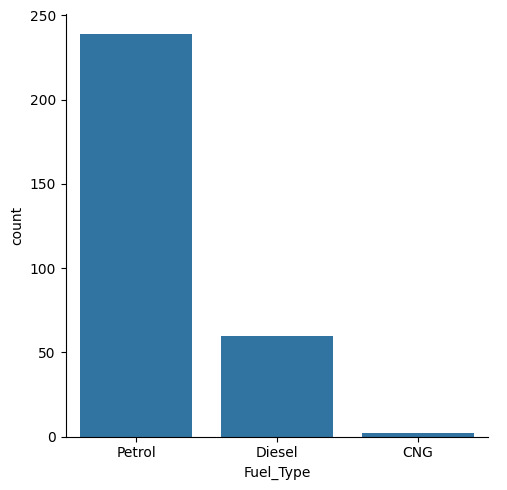

In [16]:
#plot the distribution of categorical data

sns.catplot(x='Fuel_Type', kind='count', data=vehicle_data)


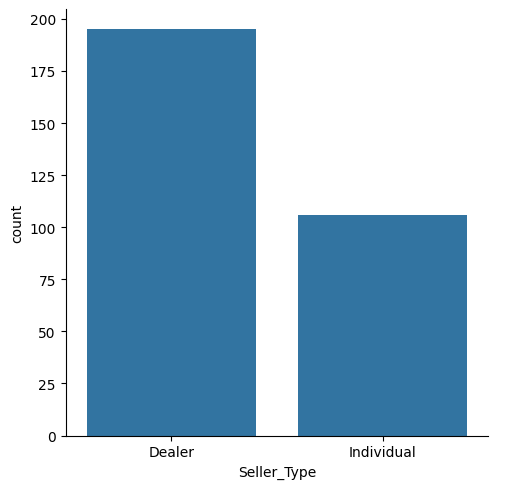

In [17]:
sns.catplot(x='Seller_Type', kind='count', data=vehicle_data)

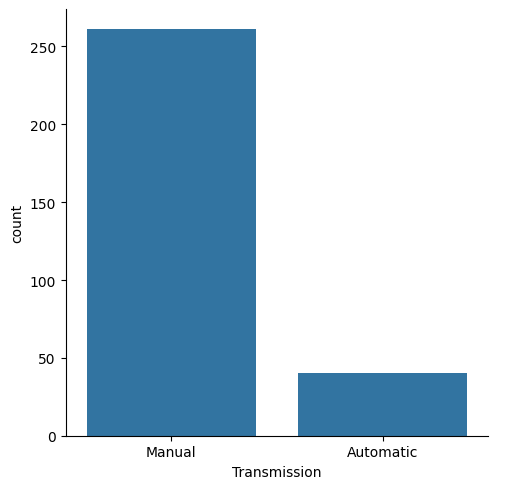

In [18]:
sns.catplot(x='Transmission', kind='count', data=vehicle_data)

Encoding catagorical data

In [19]:
# encoding "Fuel_Type" Column
vehicle_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
vehicle_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
vehicle_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [20]:
vehicle_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [21]:
#splitting data and target

X = vehicle_data.drop(['Car_Name','Selling_Price'],axis=1)
Y = vehicle_data['Selling_Price']

In [22]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [23]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [24]:
#Split train and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2)


In [25]:
#model training

model = LinearRegression()




In [26]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
# prediction on Training data
training_data_prediction = model.predict(X_train)

In [29]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


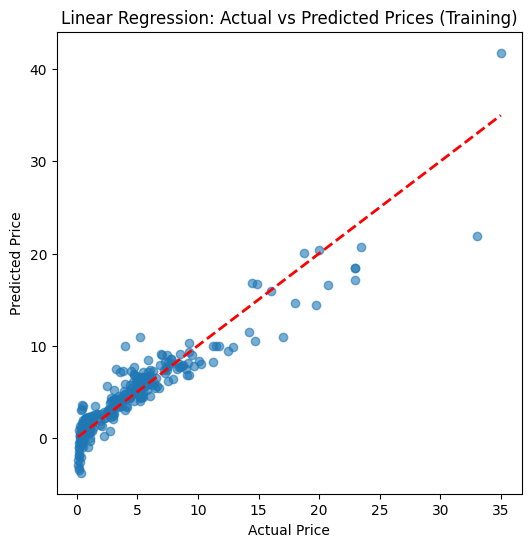

In [56]:
import matplotlib.pyplot as plt

# Predict on training data
training_pred_linear = model.predict(X_train)

plt.figure(figsize=(6,6))
plt.scatter(Y_train, training_pred_linear, alpha=0.6)
plt.plot([Y_train.min(), Y_train.max()],
         [Y_train.min(), Y_train.max()],
         'r--', linewidth=2)  # Reference line (Perfect prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices (Training)")
plt.show()


In [31]:
test_data_prediction = model.predict(X_test)

In [32]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


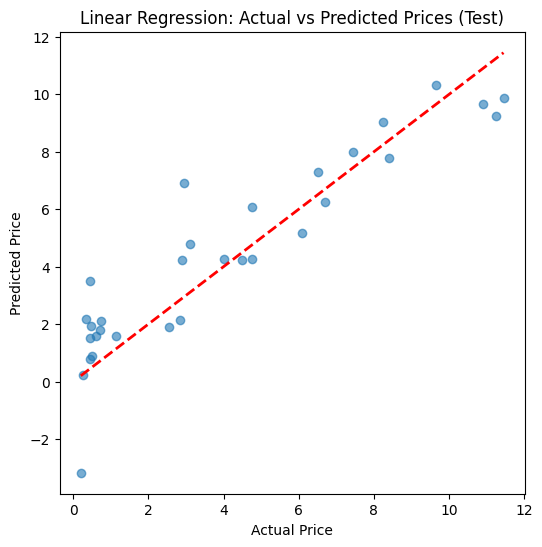

In [57]:
# Predict on test data
test_pred_linear = model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(Y_test, test_pred_linear, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--', linewidth=2)  # Reference line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted Prices (Test)")
plt.show()


In [44]:
#Lasso Regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = Lasso(alpha=0.1)
model2.fit(X_train_scaled, Y_train)


Lasso(alpha=0.1)

In [48]:
import numpy as np
from sklearn import metrics

training_data_prediction = model2.predict(X_train_scaled)

r2_train = metrics.r2_score(Y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)

mse_train = metrics.mean_squared_error(Y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)

print("Training R² Score:", r2_train)
print("Training MAE:", mae_train)
print("Training RMSE:", rmse_train)


Training R² Score: 0.8781822849498023
Training MAE: 1.198157267647051
Training RMSE: 1.818484622179528


In [49]:
test_data_prediction = model2.predict(X_test_scaled)

r2_test = metrics.r2_score(Y_test, test_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, test_data_prediction)

mse_test = metrics.mean_squared_error(Y_test, test_data_prediction)
rmse_test = np.sqrt(mse_test)

print("Test R² Score:", r2_test)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)


Test R² Score: 0.8499324252048709
Test MAE: 1.1308259735430202
Test RMSE: 1.4051372836130787


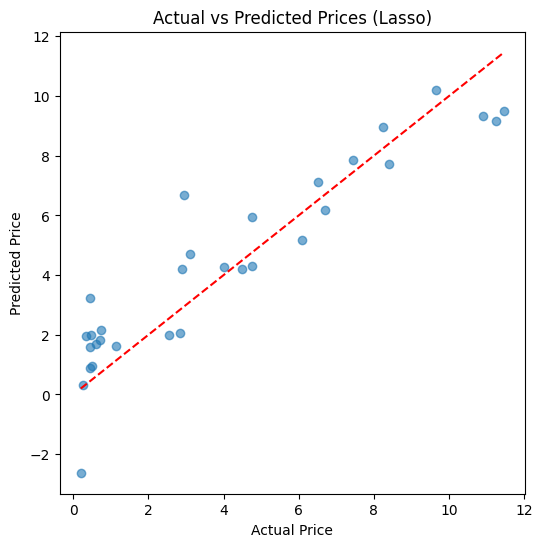

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(Y_test, test_data_prediction, alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Lasso)")
plt.show()


In [60]:
import pandas as pd

# Example input as a DataFrame
input_df = pd.DataFrame({
    'Year': [2013],
    'Present_Price': [7.0],
    'Kms_Driven': [70000],
    'Fuel_Type': [1],
    'Seller_Type': [0],
    'Transmission': [0],
    'Owner': [0],
    'Car_Name': ["Maruti Swift"]  # only for display, not used in model
})

# extract features for model
X_input = input_df.drop(columns=['Car_Name'])

# scale
X_input_scaled = scaler.transform(X_input)

# predict
prediction = model2.predict(X_input_scaled)
# prediction = model.predict(X_input)
print(f"Predicted Selling Price for '{input_df['Car_Name'][0]}': {prediction[0]:.2f} ")
print("R² Score:", r2_test)
print("Test MAE:", mae_test)
print("Test RMSE:", rmse_test)


Predicted Selling Price for 'Maruti Swift': 5.48 
R² Score: 0.8499324252048709
Test MAE: 1.1308259735430202
Test RMSE: 1.4051372836130787
